In [148]:
import pandas as pd
import numpy as np

# FITNESS TRACKING PRODUCTS ECOMMERCE

# AIM OF A PROJECT

Building a predictive model for finding appropiate discount or Finding relationship between Price and Discounts

# STEPS FOR THE PROJECT

1. Problem Identification

2. Bussiness Understanding

3. Collecting Data

4. Pre-Processing Data

5. Analyzing Data

6. Data Modeling

7. Model Evaluation

8. Model Training 

9. Model Deployment

## Problem Identification , Bussiness Understanding , Collecting Data

In [149]:
df = pd.read_csv("smartwatches.csv")

In [150]:
df = df.loc[:, ~df.columns.str.contains('Unnamed')]


In [151]:
df.drop_duplicates(inplace = True)

In [152]:
df.shape

(440, 15)

In [153]:
#Splitting Data in a train and Test 

train_df =df.sample(frac = 0.8,random_state = 42)
test_df = df.drop(train_df.index)

In [154]:
test_df.shape

(88, 15)

In [155]:
train_df.shape

(352, 15)

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 275 to 217
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                352 non-null    object 
 1   Current Price        345 non-null    float64
 2   Original Price       295 non-null    float64
 3   Discount Percentage  295 non-null    float64
 4   Rating               349 non-null    float64
 5   Number OF Ratings    304 non-null    float64
 6   Model Name           325 non-null    object 
 7   Dial Shape           261 non-null    object 
 8   Strap Color          261 non-null    object 
 9   Strap Material       299 non-null    object 
 10  Touchscreen          321 non-null    object 
 11  Battery Life (Days)  327 non-null    float64
 12  Bluetooth            347 non-null    object 
 13  Display Size         326 non-null    object 
 14  Weight               205 non-null    object 
dtypes: float64(6), object(9)
memory usage: 44.0

In [157]:
train_df.isnull().sum()

Brand                    0
Current Price            7
Original Price          57
Discount Percentage     57
Rating                   3
Number OF Ratings       48
Model Name              27
Dial Shape              91
Strap Color             91
Strap Material          53
Touchscreen             31
Battery Life (Days)     25
Bluetooth                5
Display Size            26
Weight                 147
dtype: int64

In [158]:
train_df

Brand  Current Price  Original Price  Discount Percentage  Rating  \
275     garmin        64990.0         82990.0            21.689360     4.7   
84     ambrane         2368.0          4499.0            47.366081     3.5   
357    ambrane         1799.0          3799.0            52.645433     4.2   
265     garmin        33490.0         36990.0             9.462017     4.6   
337    gizmore         1199.0          4499.0            73.349633     4.7   
..         ...            ...             ...                  ...     ...   
289     huawei        10990.0         20990.0            47.641734     4.5   
390  zebronics         2199.0          4999.0            56.011202     3.9   
347    gizmore         1999.0          5999.0            66.677780     3.5   
246    amazfit         6999.0          9999.0            30.003000     3.7   
217     fitbit        14999.0             NaN                  NaN     4.7   

     Number OF Ratings                                         Model Name  \
275                NaN  Fenix 6S Sapphire, Premium GPS Watch, Music, P...   
84               301.0                                       FitShot Curl   
357             8003.0               Flex 1.69inch Lucid display and SPO2   
265                5.0  Instinct 2, Battery Upto 28 days, Tracback Rou...   
337                NaN  GizFit CLOUD 1.85 IPS Large Display | AI Voice...   
..                 ...                                                ...   
289              203.0                                     Watch GT Sport   
390              272.0                                         Zeb-Fit Me   
347               30.0  Gizfit Slate BT Calling | 1.57 Inch display | ...   
246               81.0  GTS2 Mini with 1.55" AMOLED Display Built-in A...   
217                NaN                                           Charge 5   

    Dial Shape Strap Color               Strap Material Touchscreen  \
275     Circle       Black                      Silicon         Yes   
84         NaN         NaN                          NaN         NaN   
357     Square        Pink                      Silicon         Yes   
265     Circle       Black                      Silicon          No   
337     Square        Blue                      Silicon         Yes   
..         ...         ...                          ...         ...   
289     Circle       Black                      Silicon         Yes   
390     Square       Green  Thermo Plastic Polyurethene         Yes   
347  Rectangle       Black                      Silicon         Yes   
246  Rectangle       Black                      Silicon         Yes   
217  Rectangle       Black                      Silicon         Yes   

     Battery Life (Days) Bluetooth Display Size     Weight  
275                 22.0       Yes   1.2 inches      75g +  
84                  12.5       Yes          NaN  35 - 50 g  
357                 22.0       Yes   1.7 inches        NaN  
265                 17.5       Yes   0.9 inches        NaN  
337                 22.0       Yes   1.8 inches  20 - 35 g  
..                   ...       ...          ...        ...  
289                  8.0       Yes   1.8 inches      75g +  
390                 22.0       Yes   3.3 inches  20 - 35 g  
347                  3.5       Yes   1.6 inches    <= 20 g  
246                  8.0       Yes   1.6 inches        NaN  
217                 22.0       Yes   1.0 inches    <= 20 g  

[352 rows x 15 columns]

In [159]:
# Seperating Numerical Data and Object Data
numerical_data = [features for features in train_df.columns if train_df[features].dtypes != "object" ]

In [160]:
categorical_data = [features for features in train_df.columns if train_df[features].dtypes == "object"]

In [161]:
numerical_data = train_df[numerical_data].describe()

In [162]:
numerical_data.corr()

Current Price  Original Price  Discount Percentage  \
Current Price             1.000000        0.998138             0.049879   
Original Price            0.998138        1.000000             0.043220   
Discount Percentage       0.049879        0.043220             1.000000   
Rating                   -0.231642       -0.245922             0.882781   
Number OF Ratings         0.982605        0.985005             0.083765   
Battery Life (Days)      -0.199668       -0.213697             0.904650   

                       Rating  Number OF Ratings  Battery Life (Days)  
Current Price       -0.231642           0.982605            -0.199668  
Original Price      -0.245922           0.985005            -0.213697  
Discount Percentage  0.882781           0.083765             0.904650  
Rating               1.000000          -0.153829             0.998400  
Number OF Ratings   -0.153829           1.000000            -0.127272  
Battery Life (Days)  0.998400          -0.127272             1.000000

In [163]:
# Checking Skewness of data
numerical_data.skew()

Current Price          2.549466
Original Price         2.599651
Discount Percentage    1.431777
Rating                 2.827440
Number OF Ratings      2.801788
Battery Life (Days)    2.803144
dtype: float64

In [164]:
import ydata_profiling as pp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


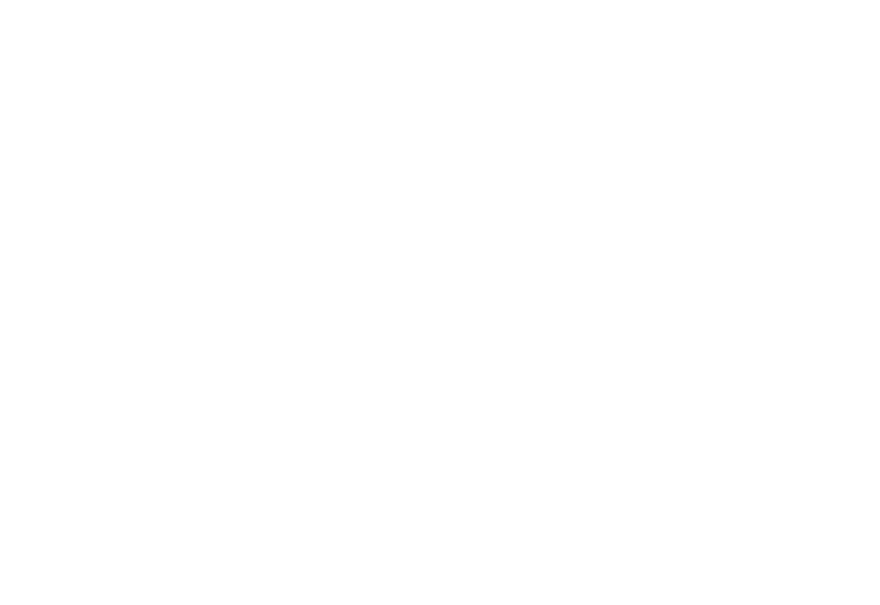

<IPython.core.display.Javascript object>


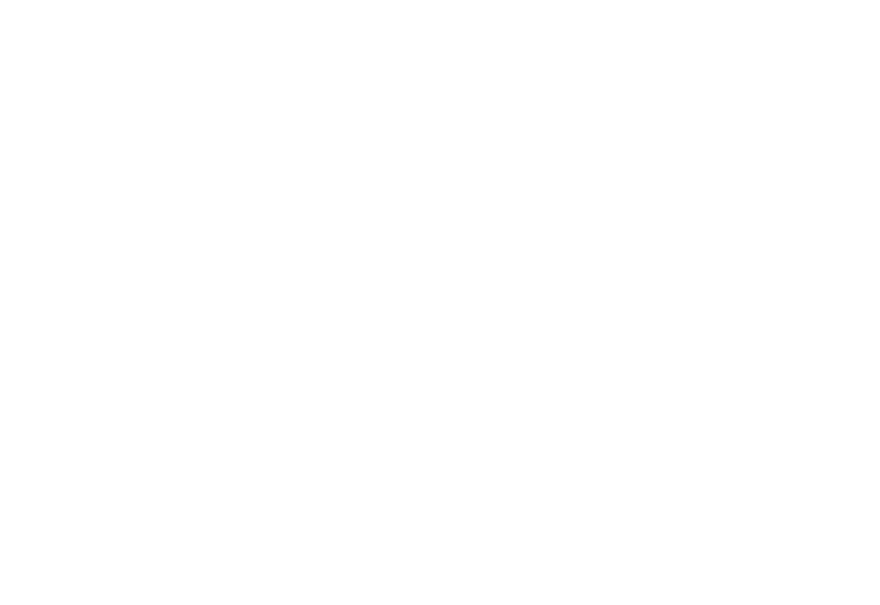

<IPython.core.display.Javascript object>


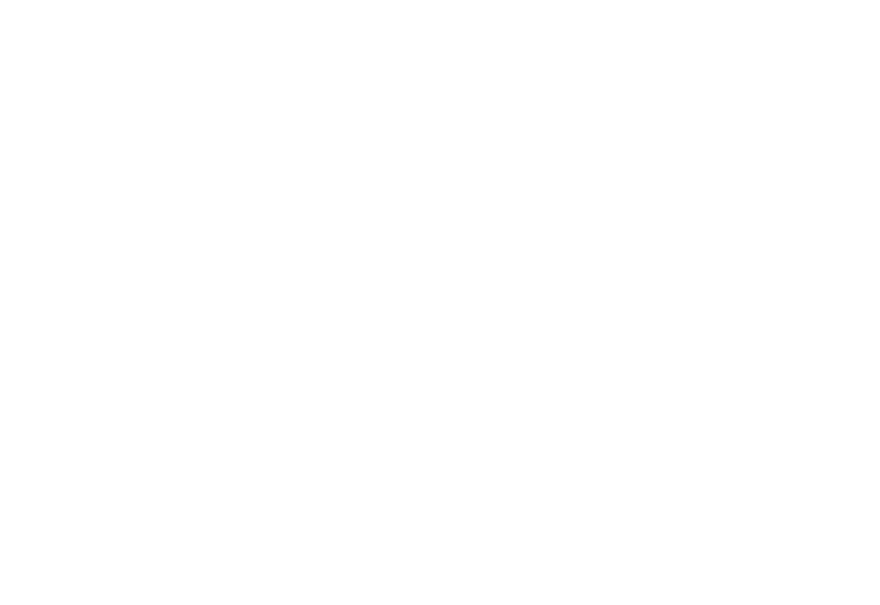

<IPython.core.display.Javascript object>


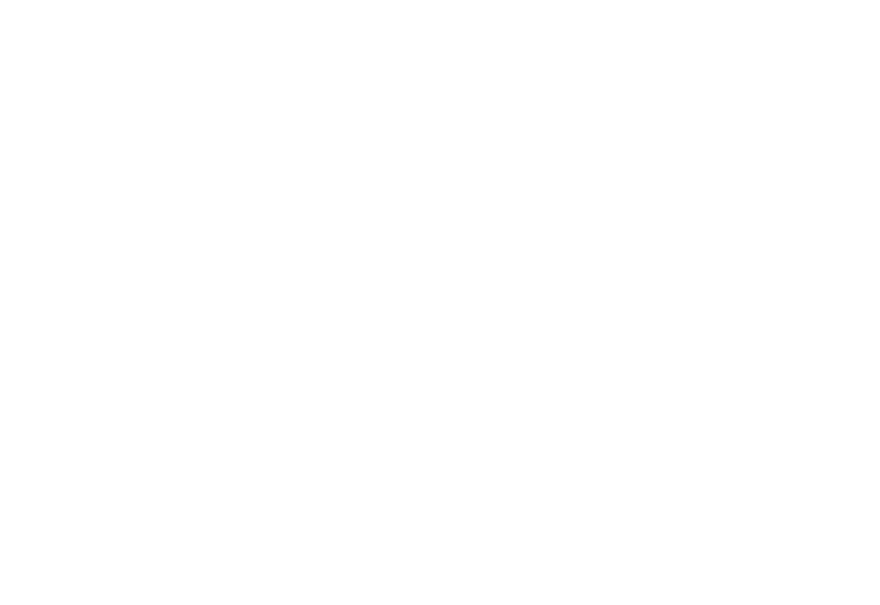

<IPython.core.display.Javascript object>


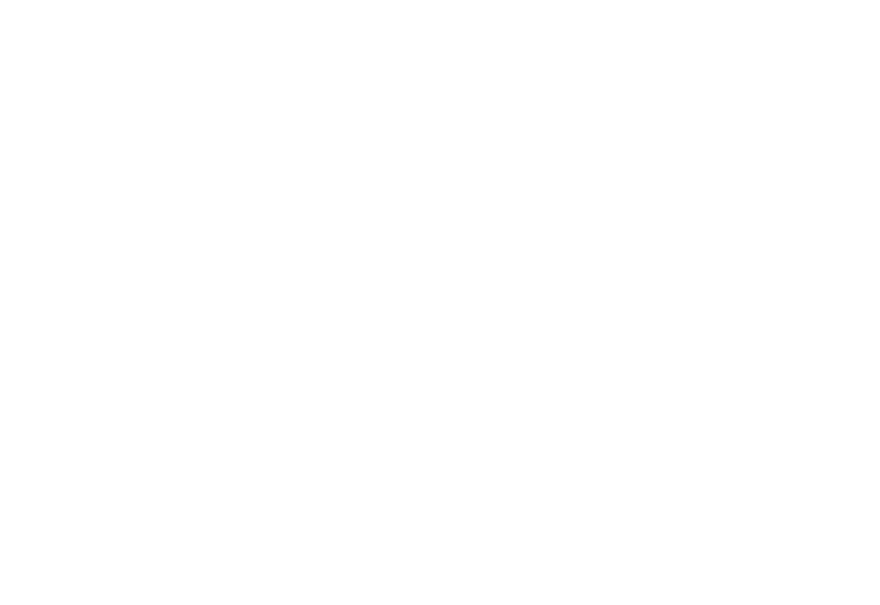

<IPython.core.display.Javascript object>


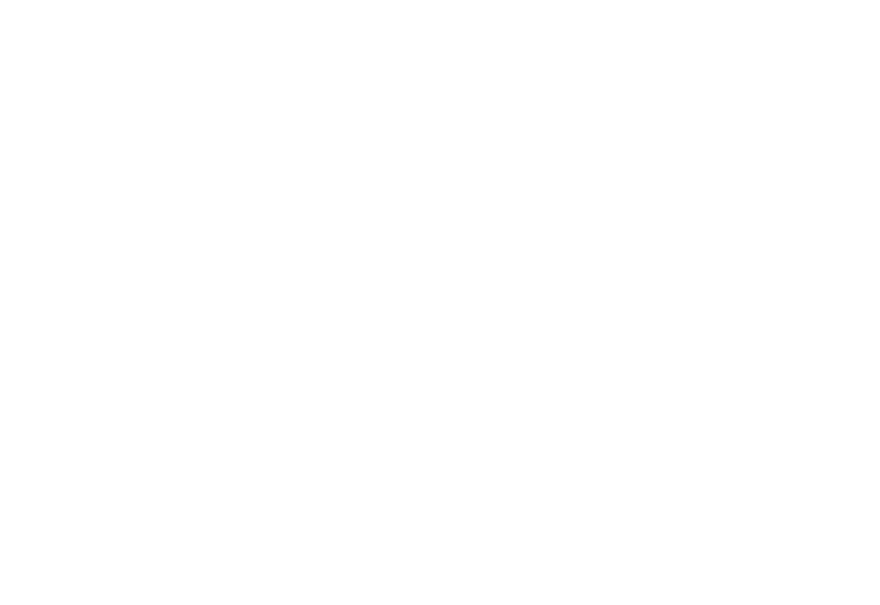

<IPython.core.display.Javascript object>


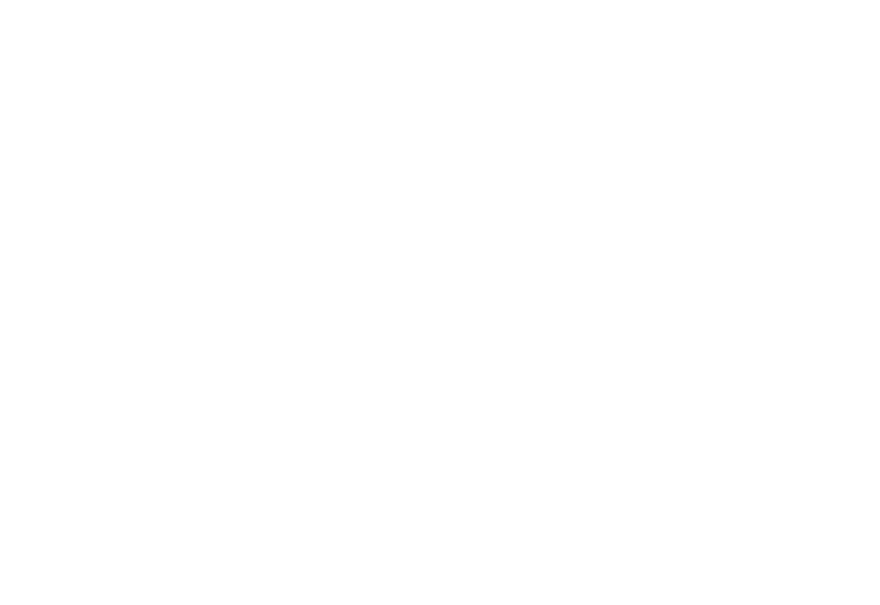

<IPython.core.display.Javascript object>


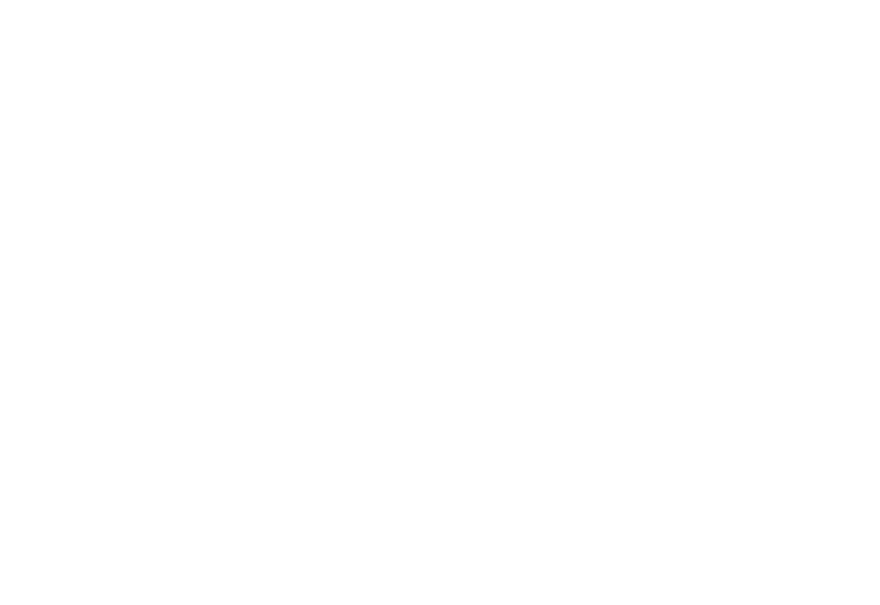

<IPython.core.display.Javascript object>


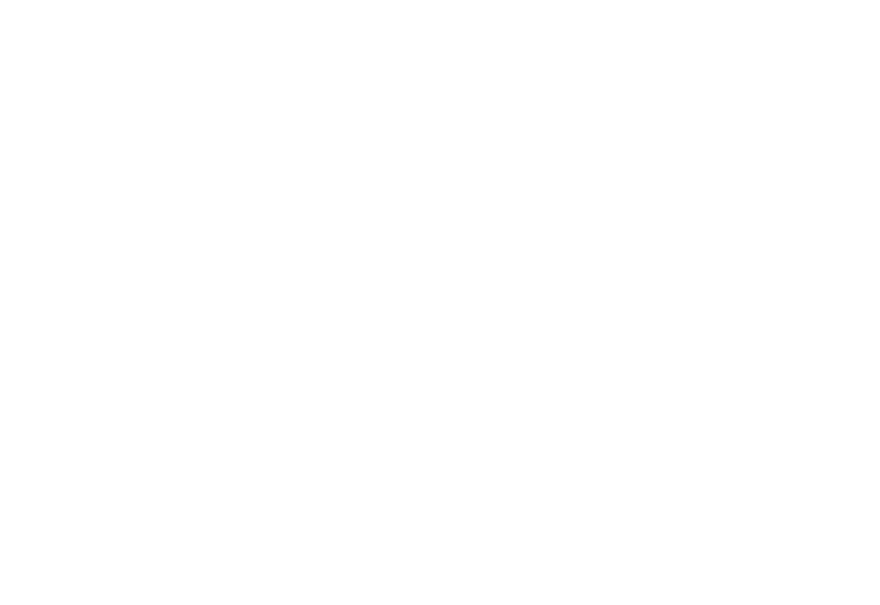

<IPython.core.display.Javascript object>


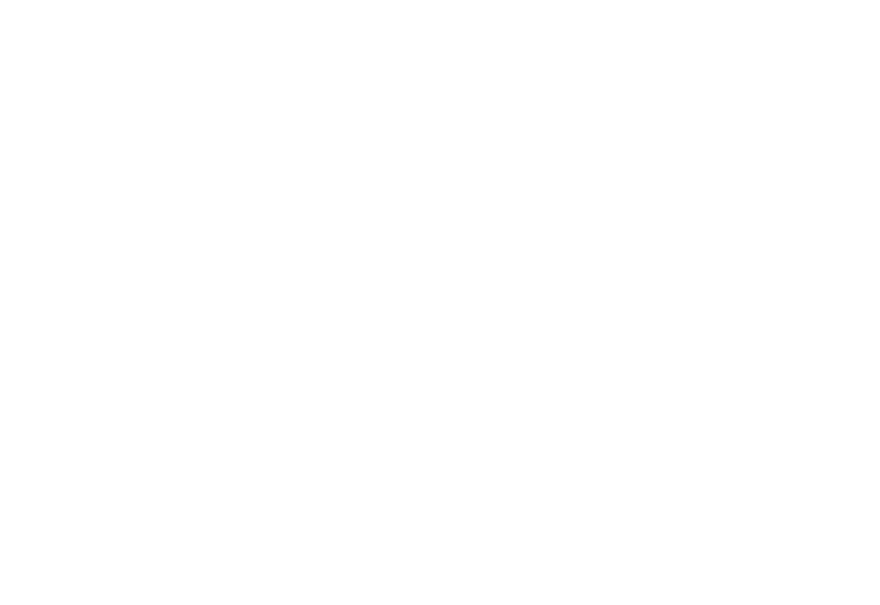

<IPython.core.display.Javascript object>


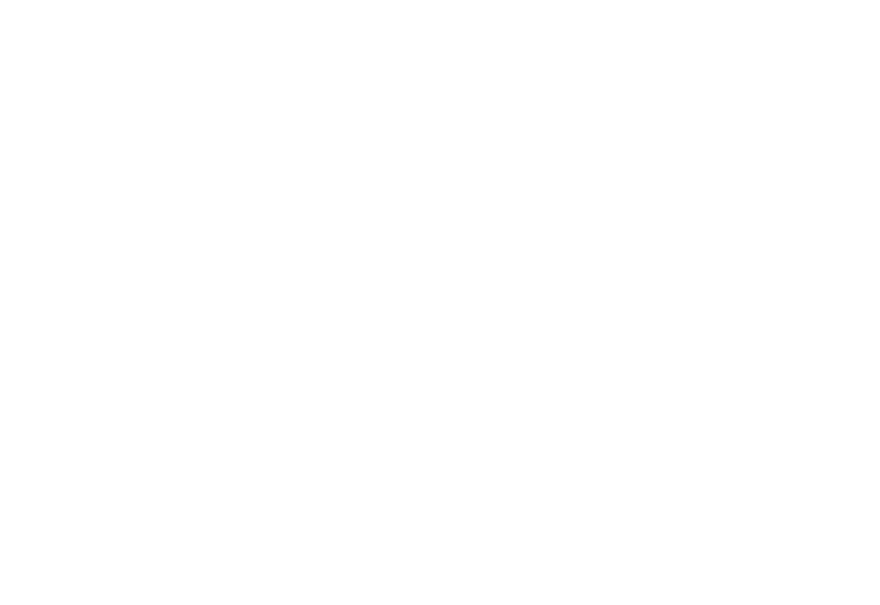

<IPython.core.display.Javascript object>


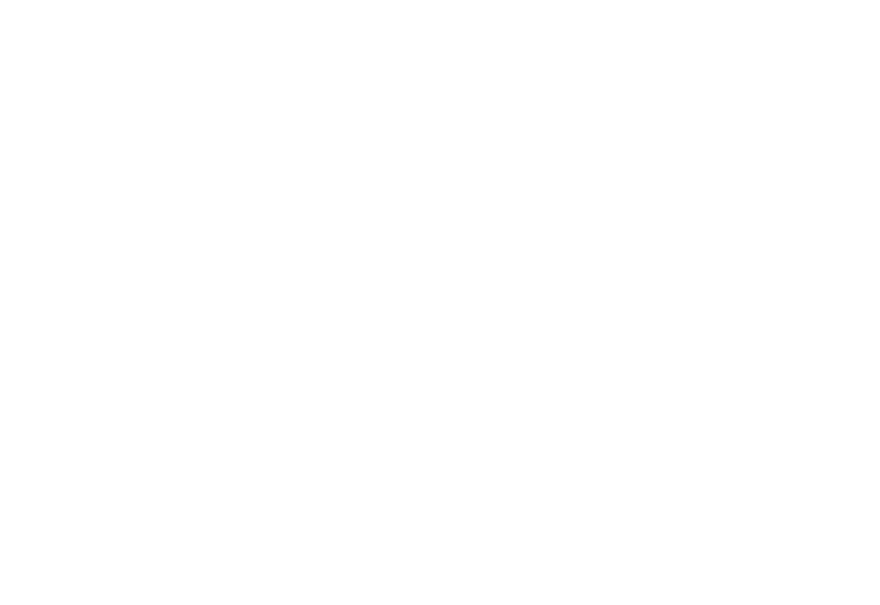

<IPython.core.display.Javascript object>


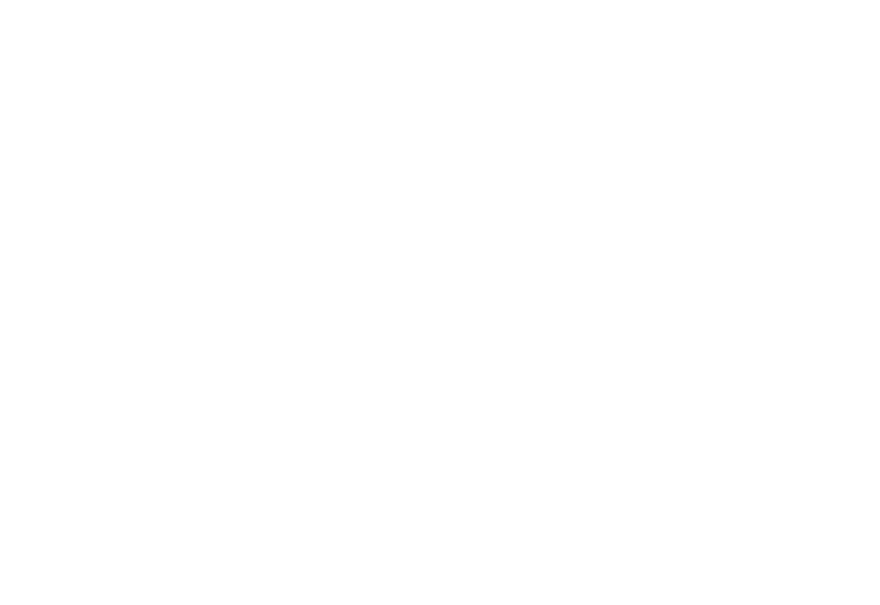

<IPython.core.display.Javascript object>


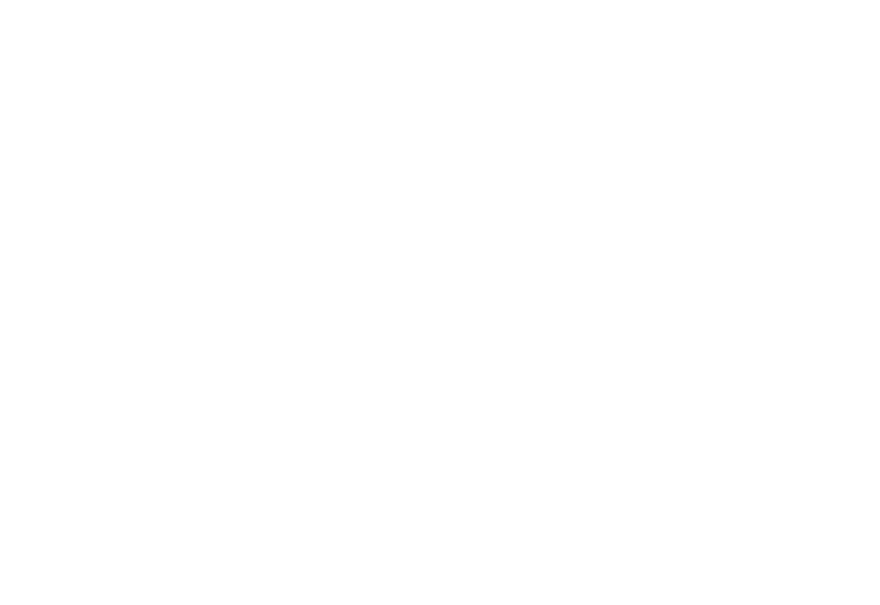

<IPython.core.display.Javascript object>


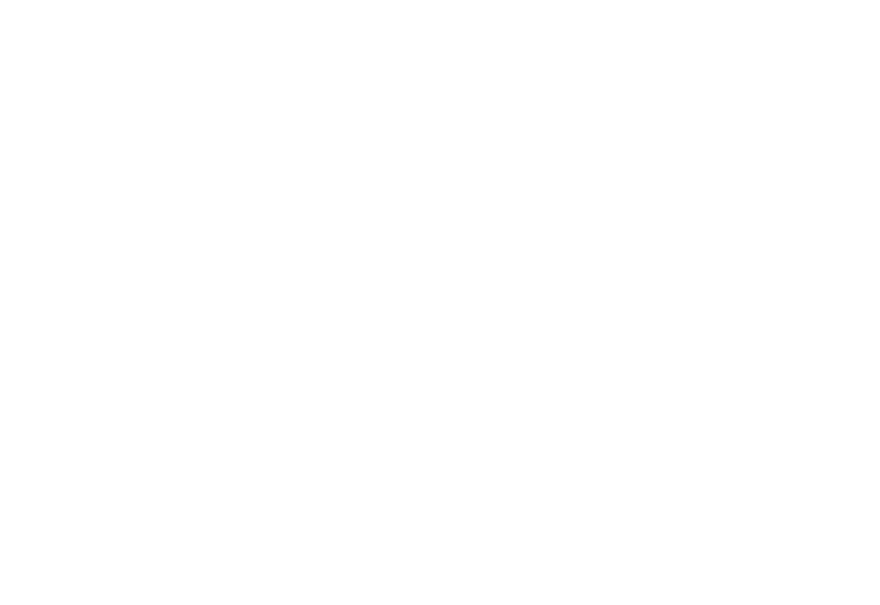

<IPython.core.display.Javascript object>


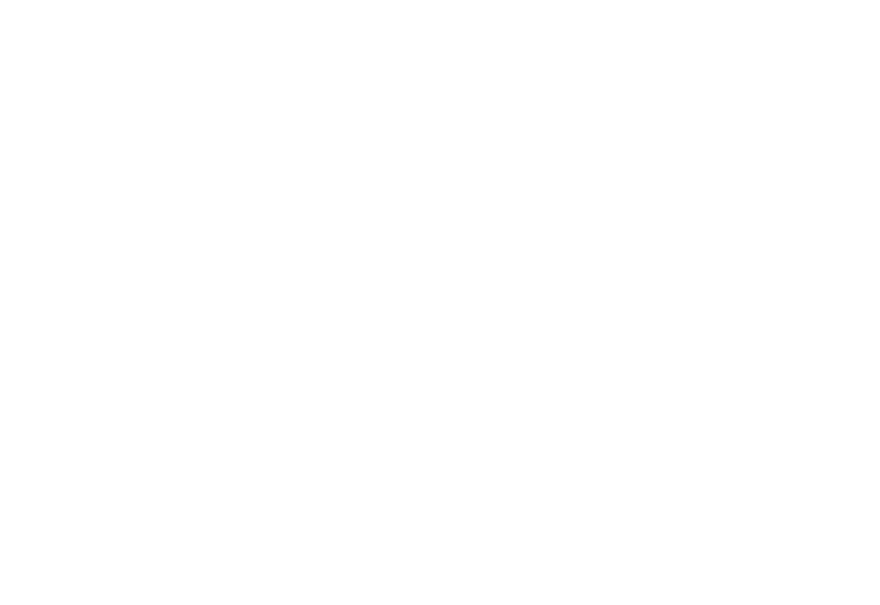

<IPython.core.display.Javascript object>


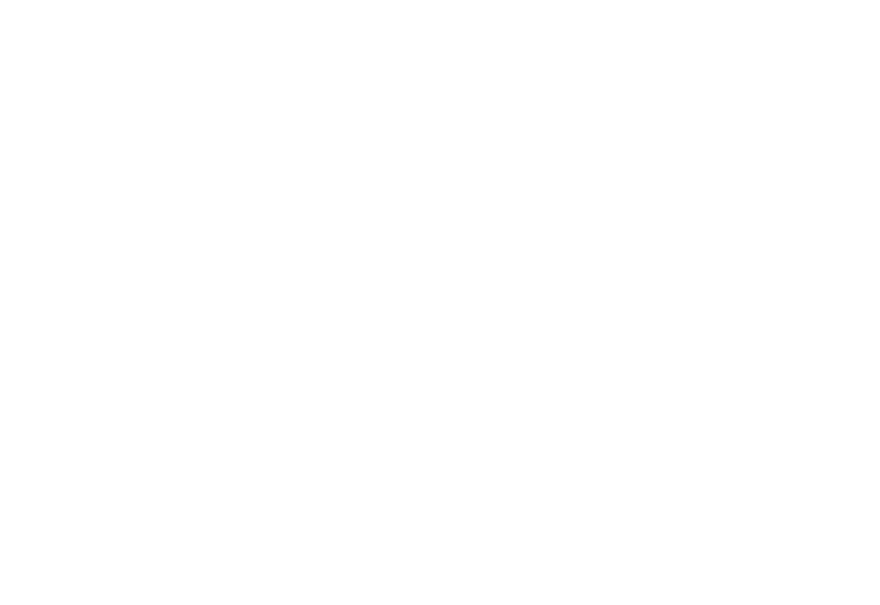

<IPython.core.display.Javascript object>


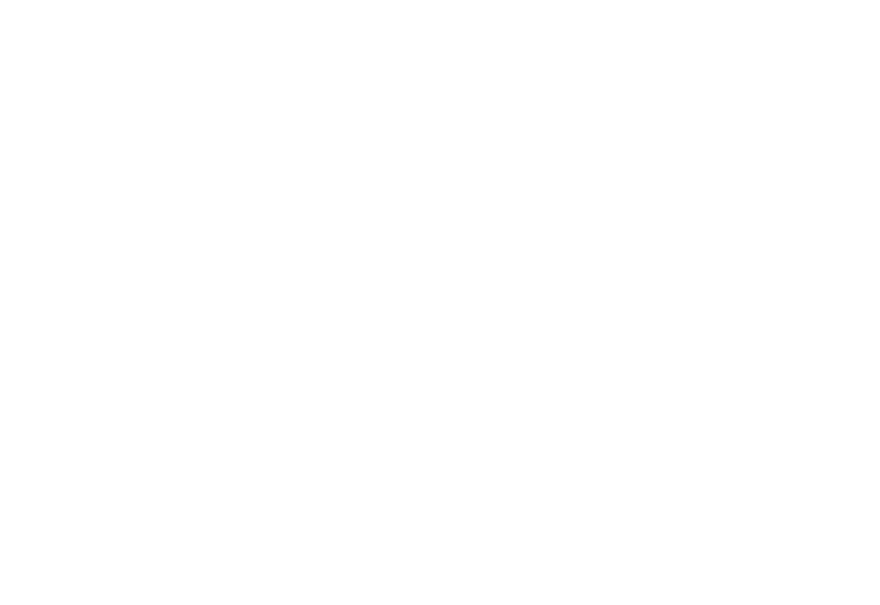

<IPython.core.display.Javascript object>


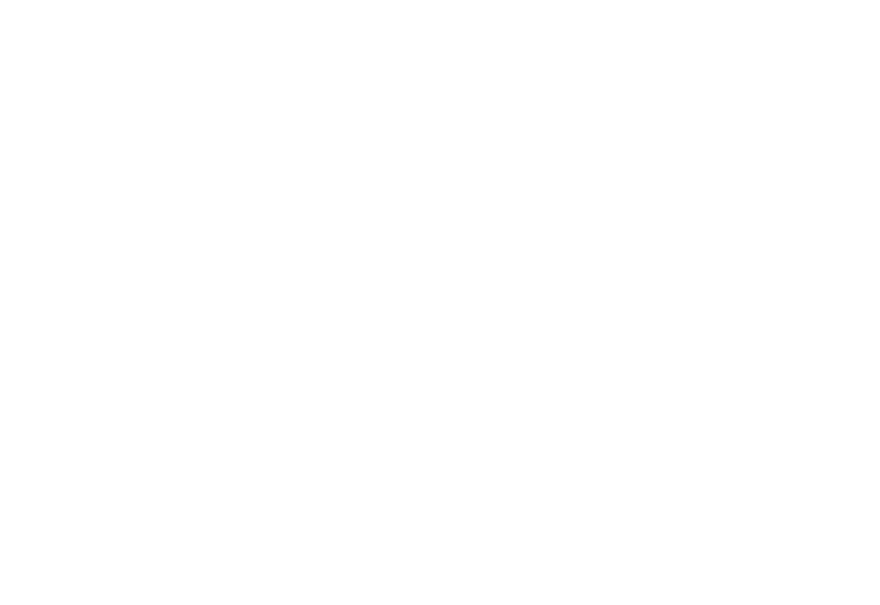

<IPython.core.display.Javascript object>


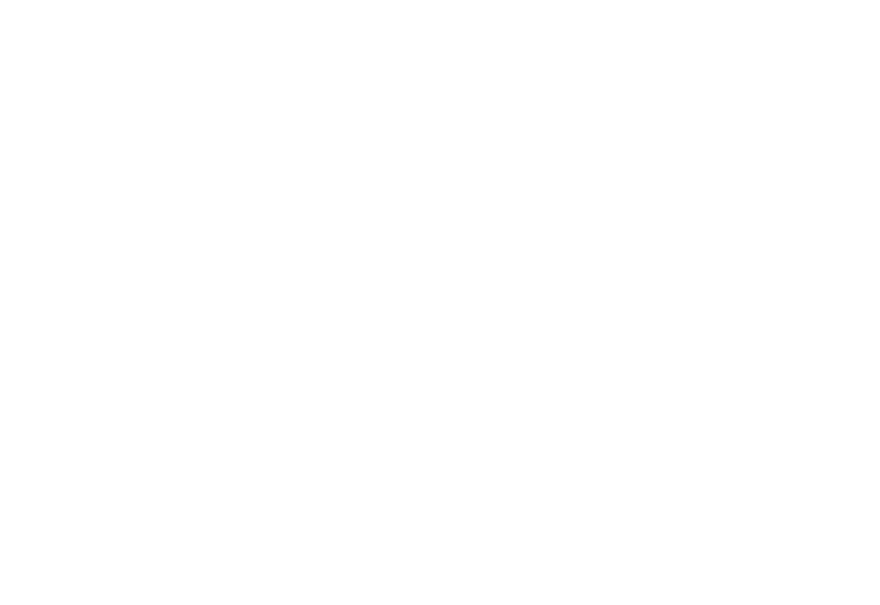

<IPython.core.display.Javascript object>


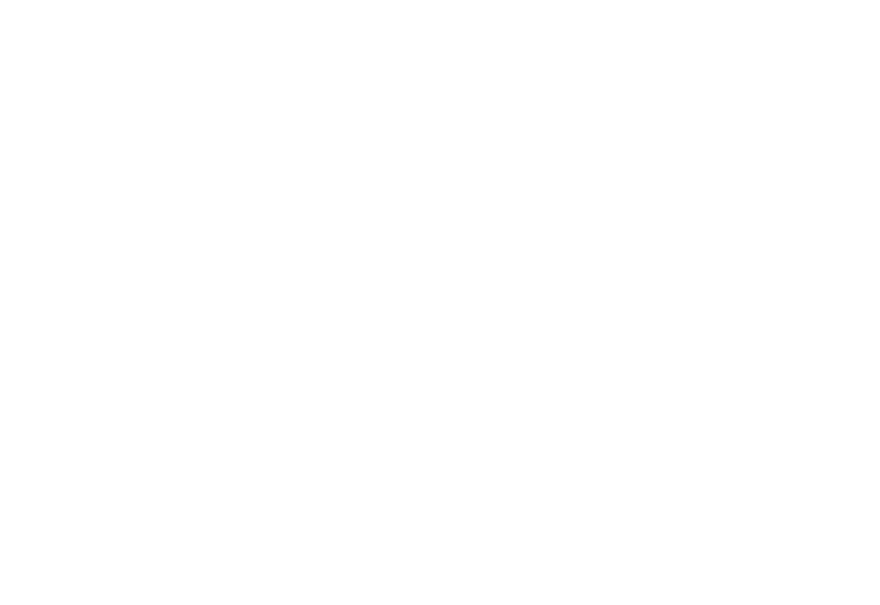

<IPython.core.display.Javascript object>


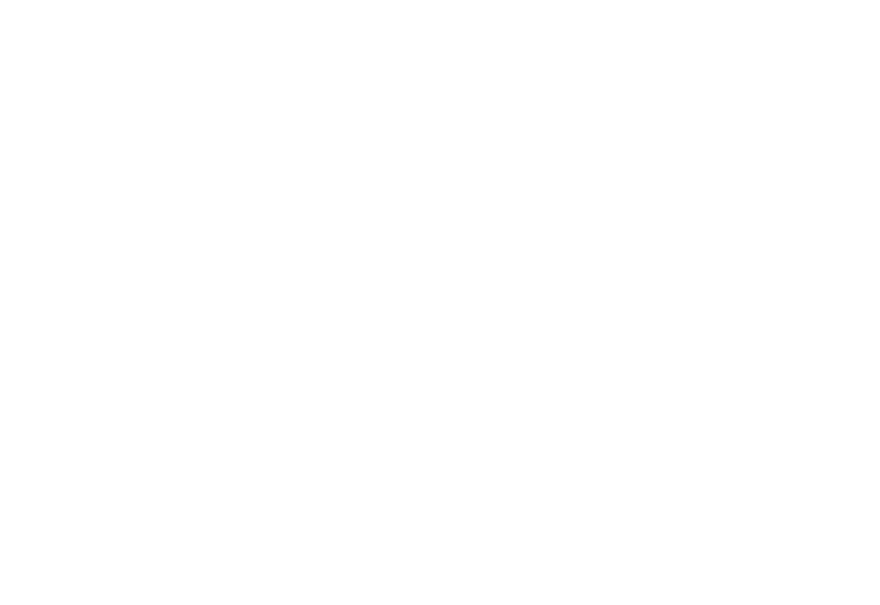

<IPython.core.display.Javascript object>


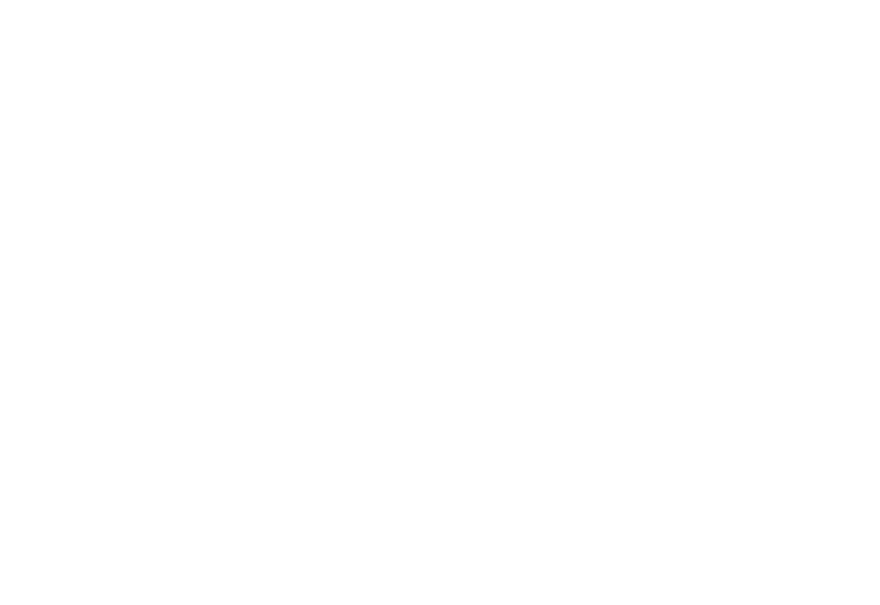

<IPython.core.display.Javascript object>


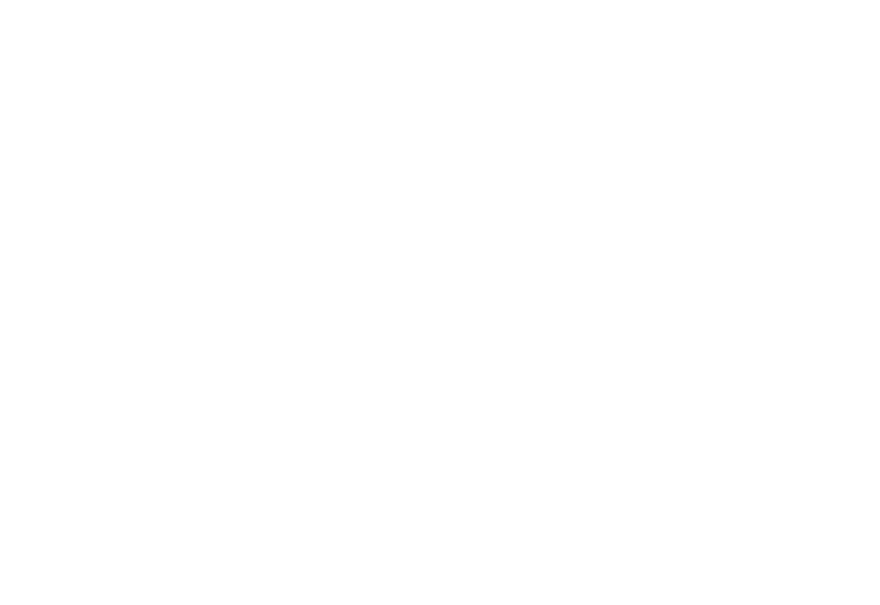

<IPython.core.display.Javascript object>


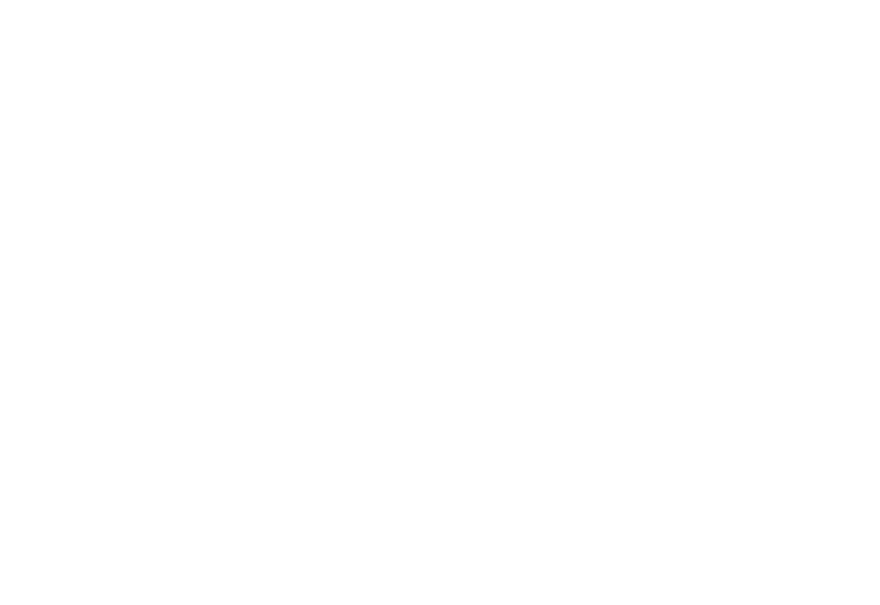

<IPython.core.display.Javascript object>


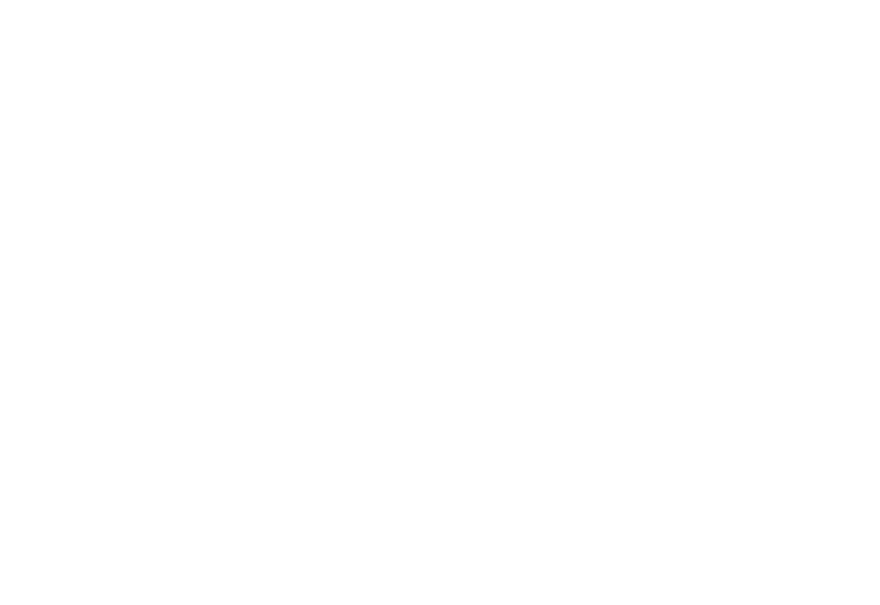

<IPython.core.display.Javascript object>


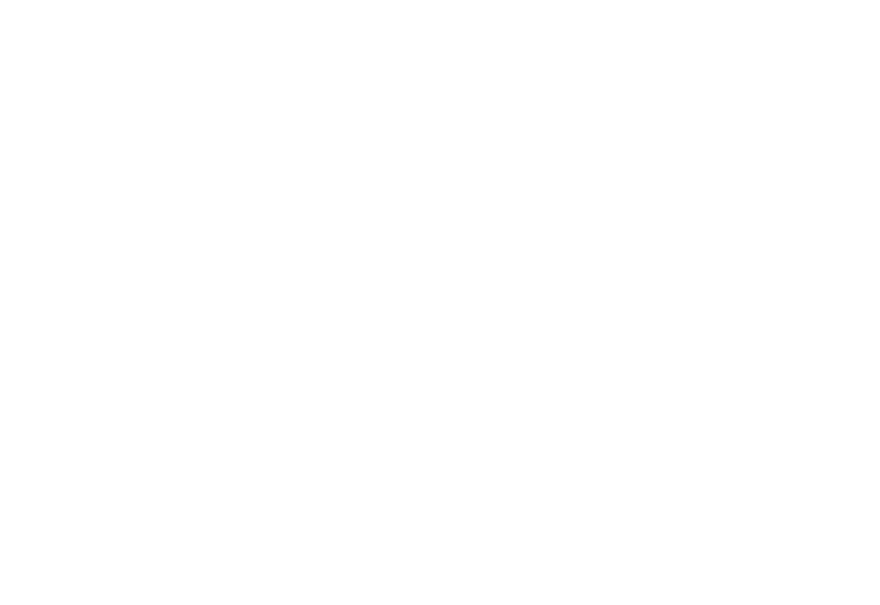

<IPython.core.display.Javascript object>


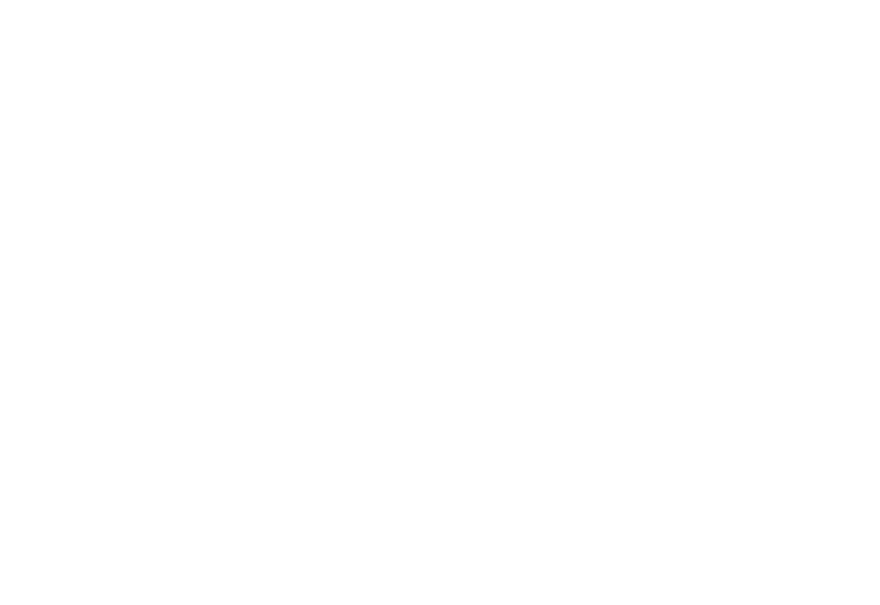

<IPython.core.display.Javascript object>


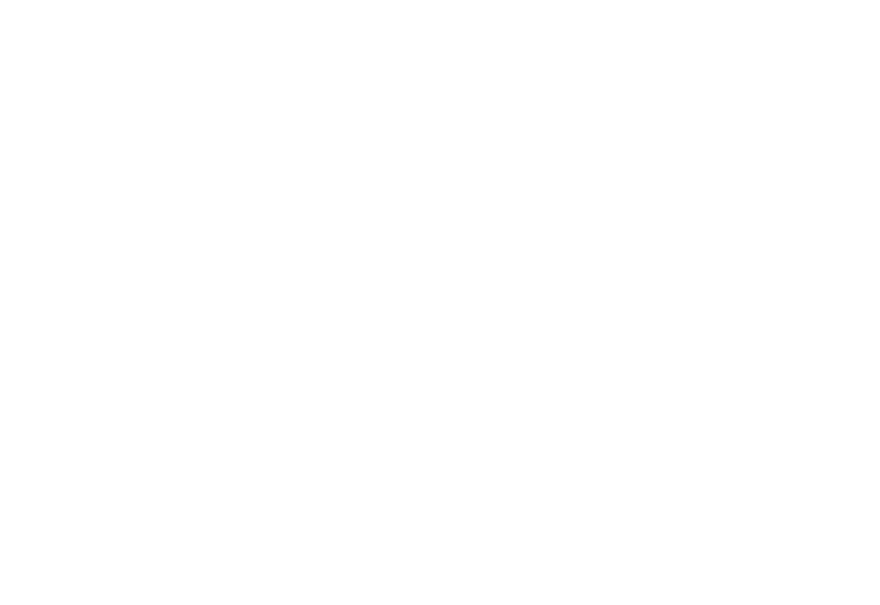

<IPython.core.display.Javascript object>


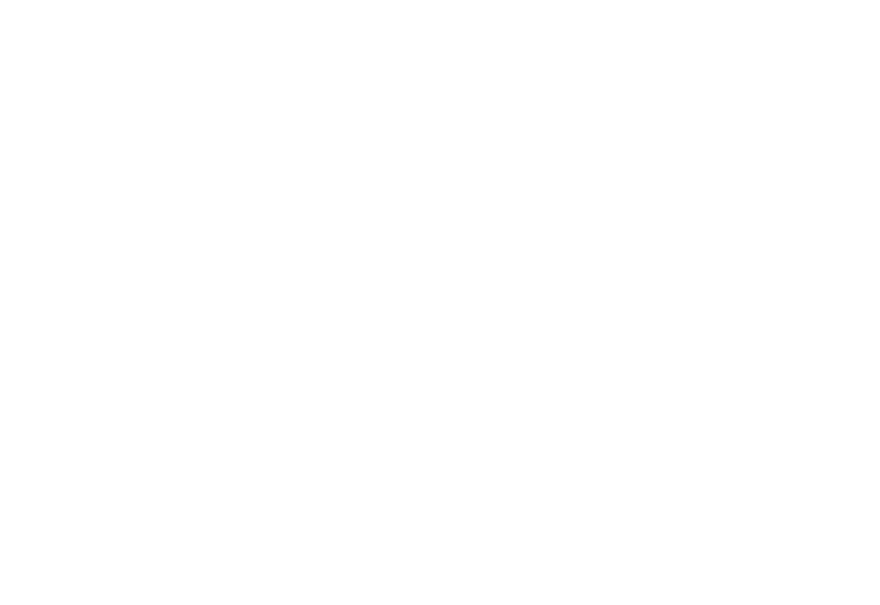

<IPython.core.display.Javascript object>


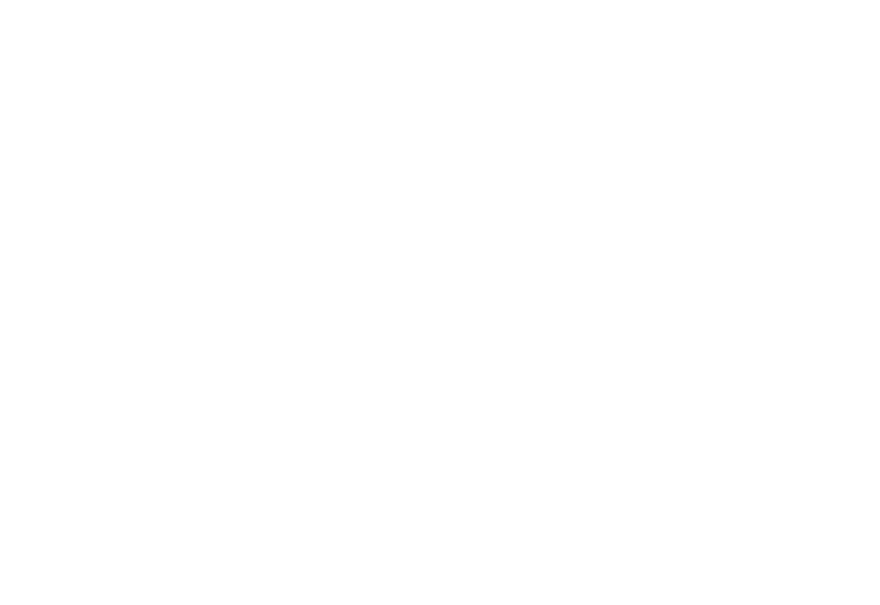

<IPython.core.display.Javascript object>


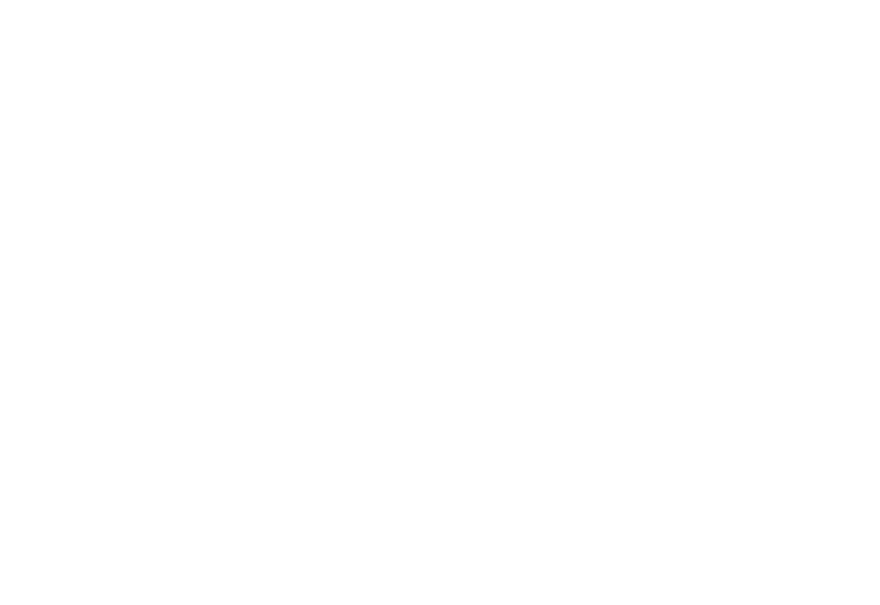

<IPython.core.display.Javascript object>


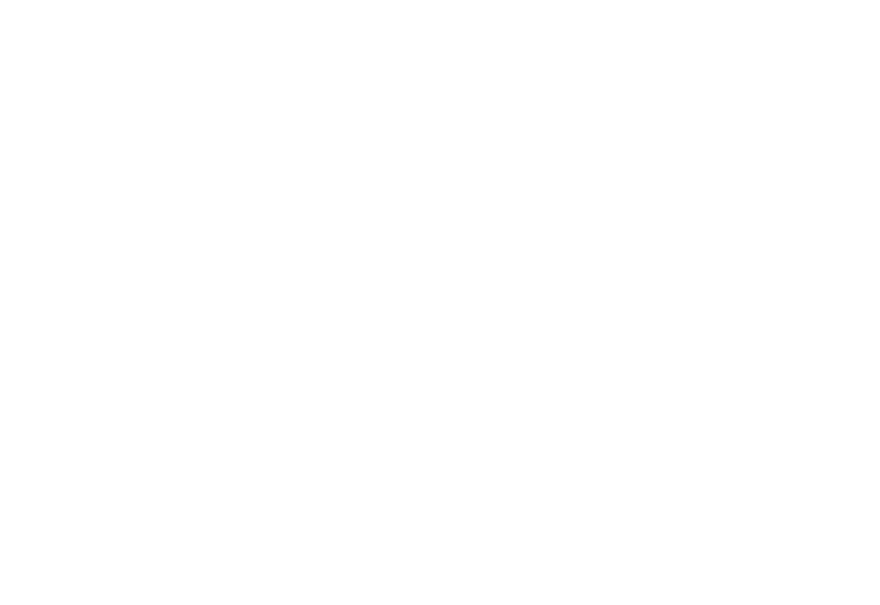

<IPython.core.display.Javascript object>


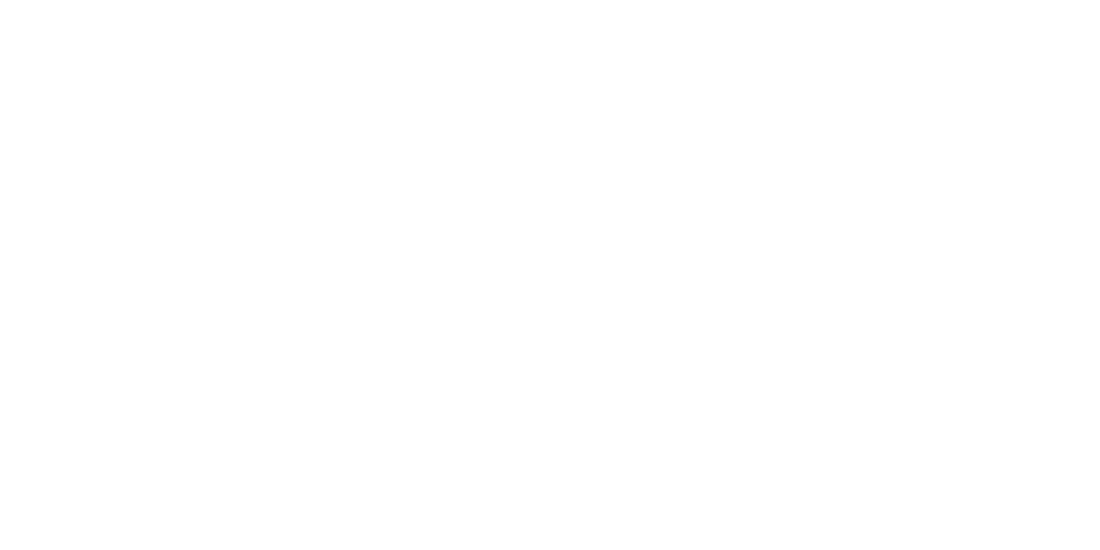

<IPython.core.display.Javascript object>


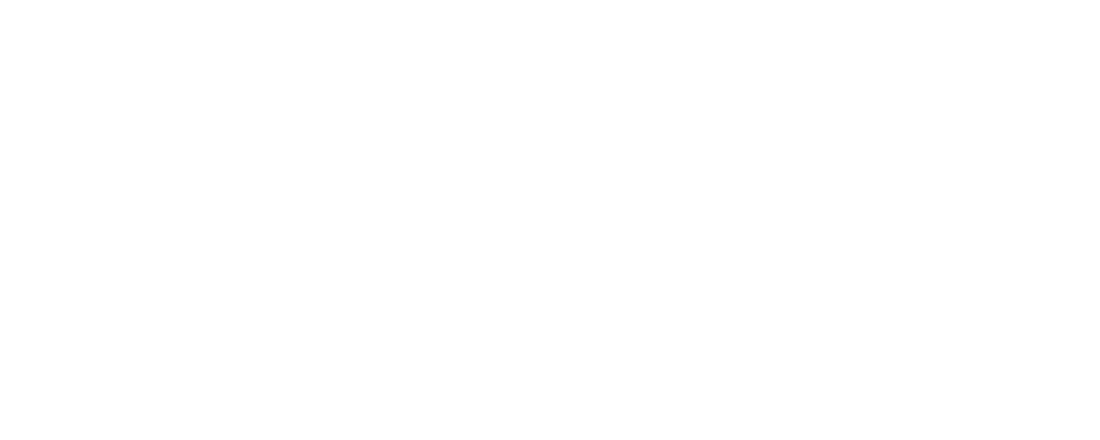

<IPython.core.display.Javascript object>


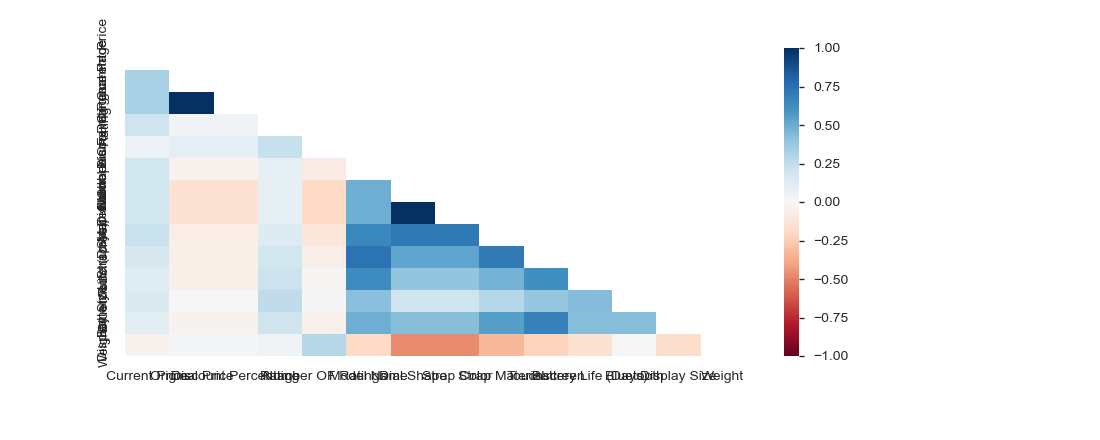

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


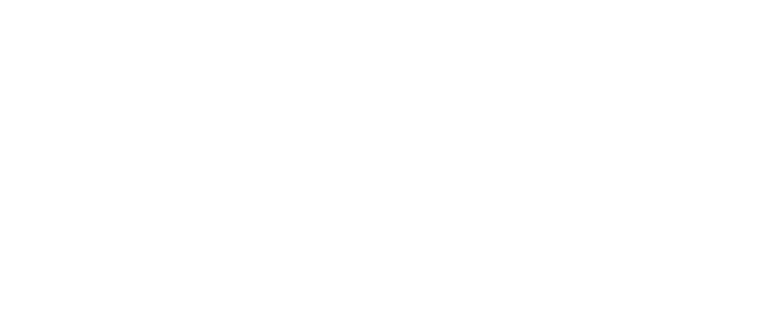

<IPython.core.display.Javascript object>


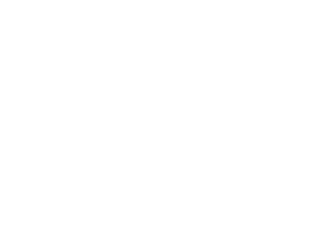

<IPython.core.display.Javascript object>


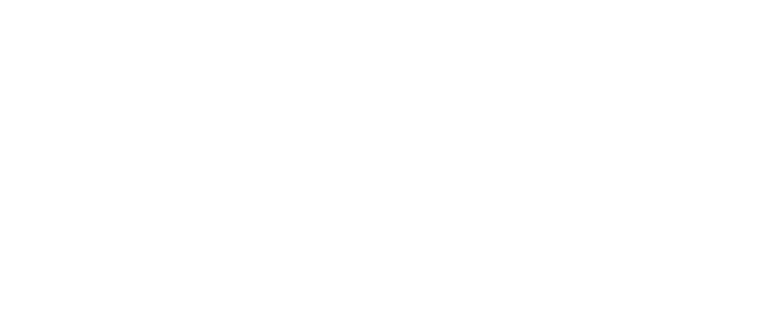

<IPython.core.display.Javascript object>


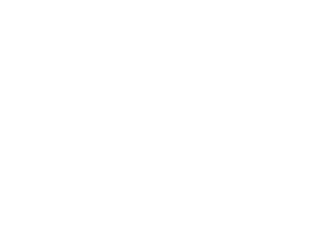

<IPython.core.display.Javascript object>


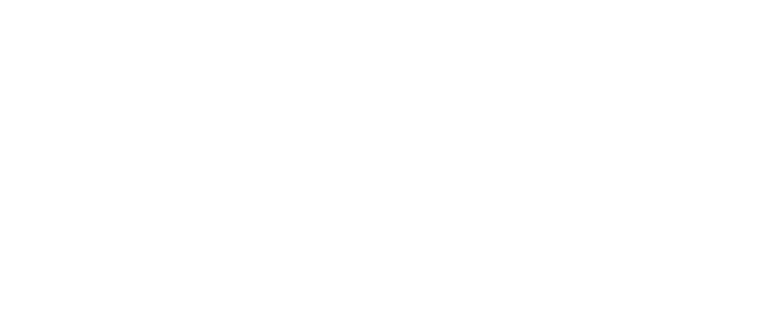

<IPython.core.display.Javascript object>


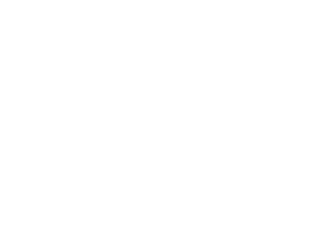

<IPython.core.display.Javascript object>


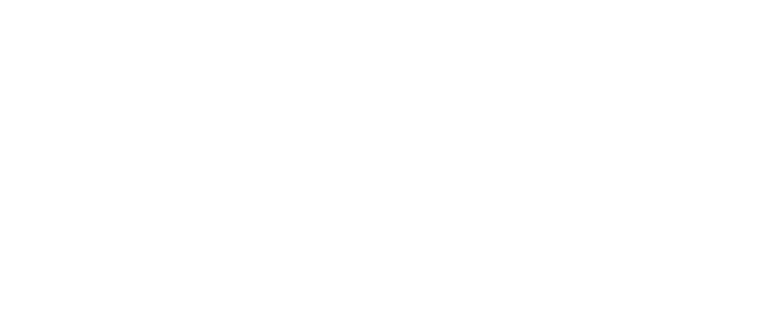

<IPython.core.display.Javascript object>


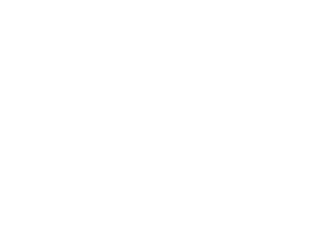

<IPython.core.display.Javascript object>


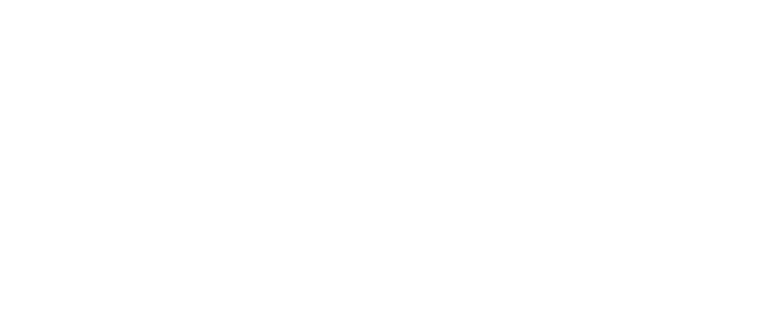

<IPython.core.display.Javascript object>


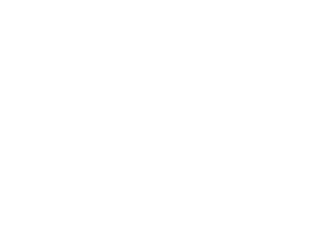

<IPython.core.display.Javascript object>


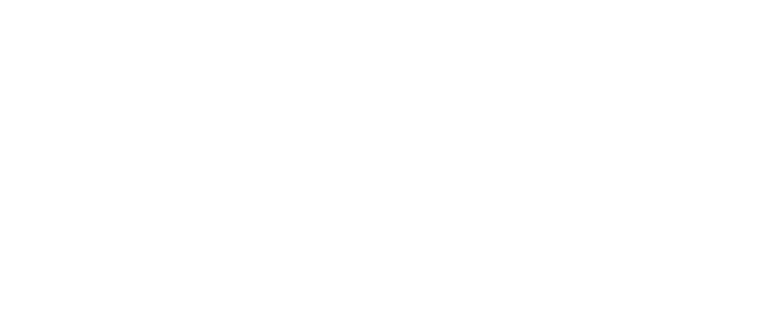

<IPython.core.display.Javascript object>


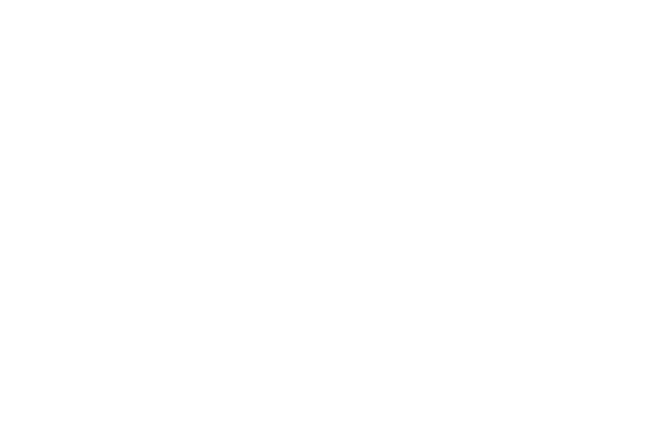

<IPython.core.display.Javascript object>


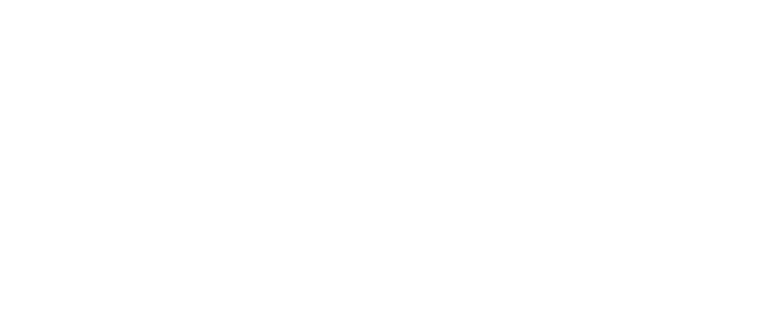

<IPython.core.display.Javascript object>


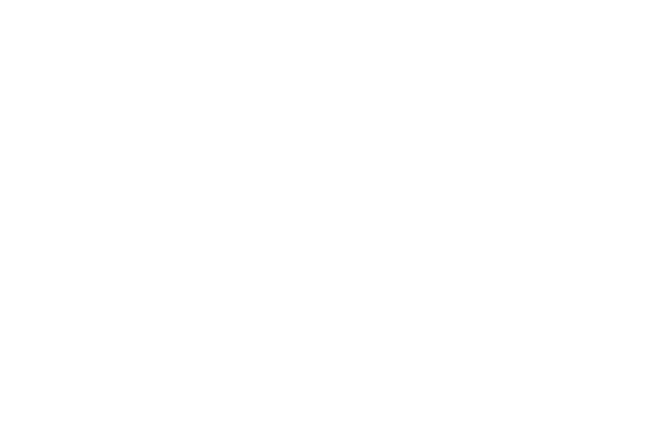

<IPython.core.display.Javascript object>


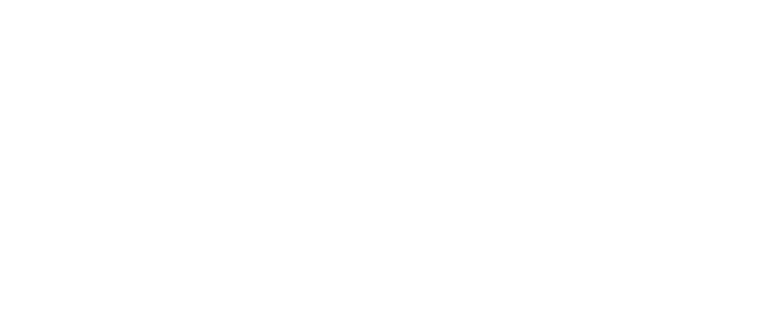

<IPython.core.display.Javascript object>


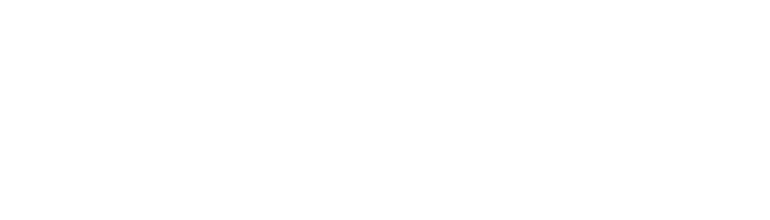

<IPython.core.display.Javascript object>


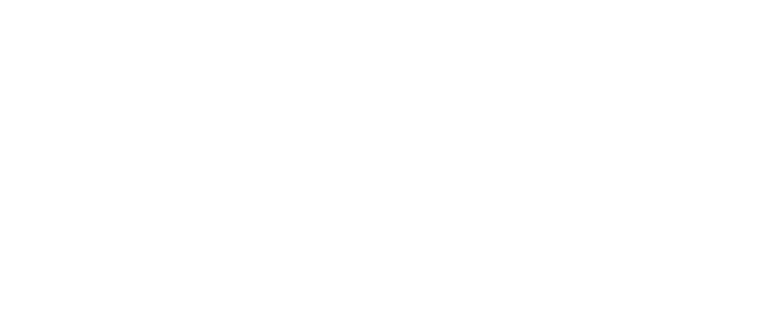

<IPython.core.display.Javascript object>


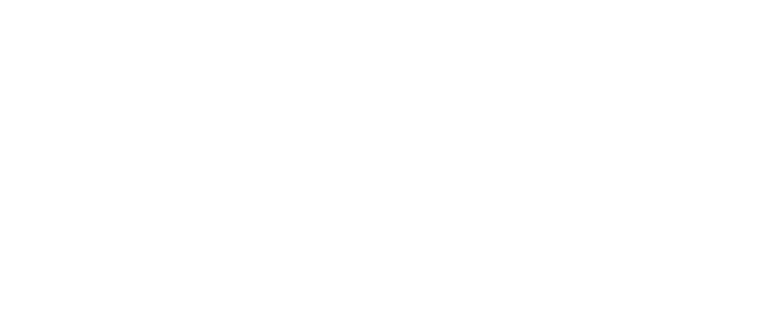

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


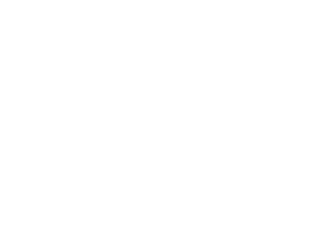

<IPython.core.display.Javascript object>


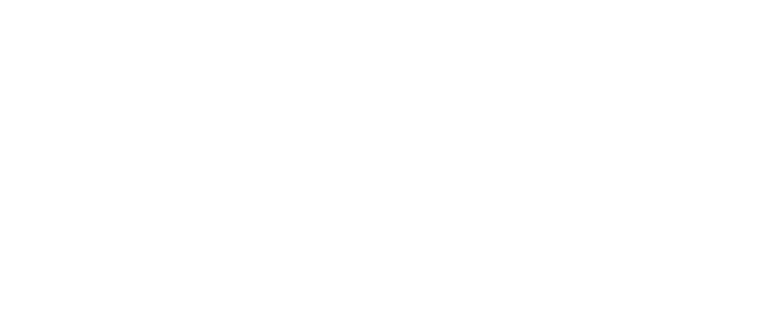

<IPython.core.display.Javascript object>


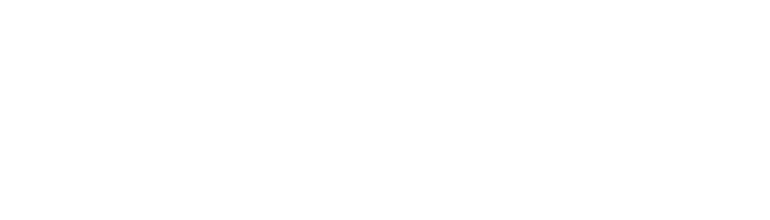

<IPython.core.display.Javascript object>


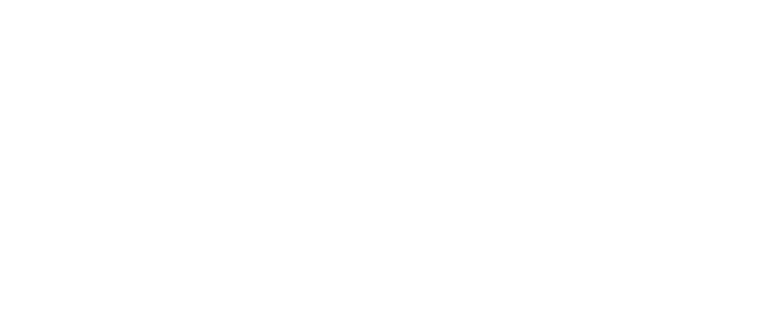

<IPython.core.display.Javascript object>


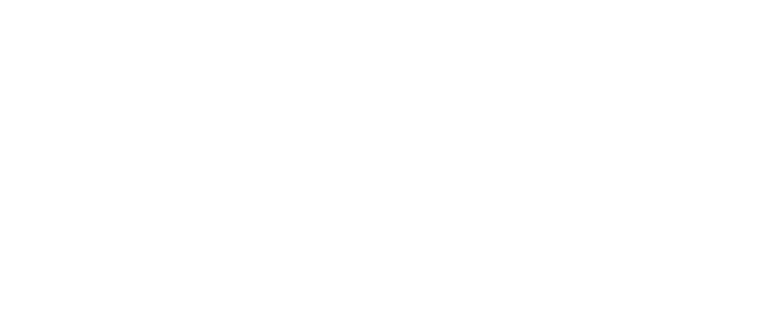

<IPython.core.display.Javascript object>


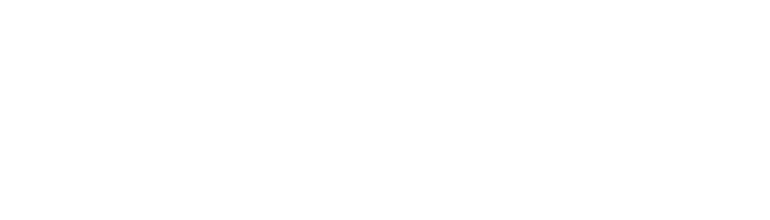

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [165]:
pp.ProfileReport(train_df)

## Analysis of Data , Preprocessing Of Data

***Univariate Analysis***

1. Histogram

2. Density Plots

3. Box and whiskerPlots

***Multivariate Plots***

1. Correlation Matrix

2. Scatter plot Matrix

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
%matplotlib notebook


<IPython.core.display.Javascript object>


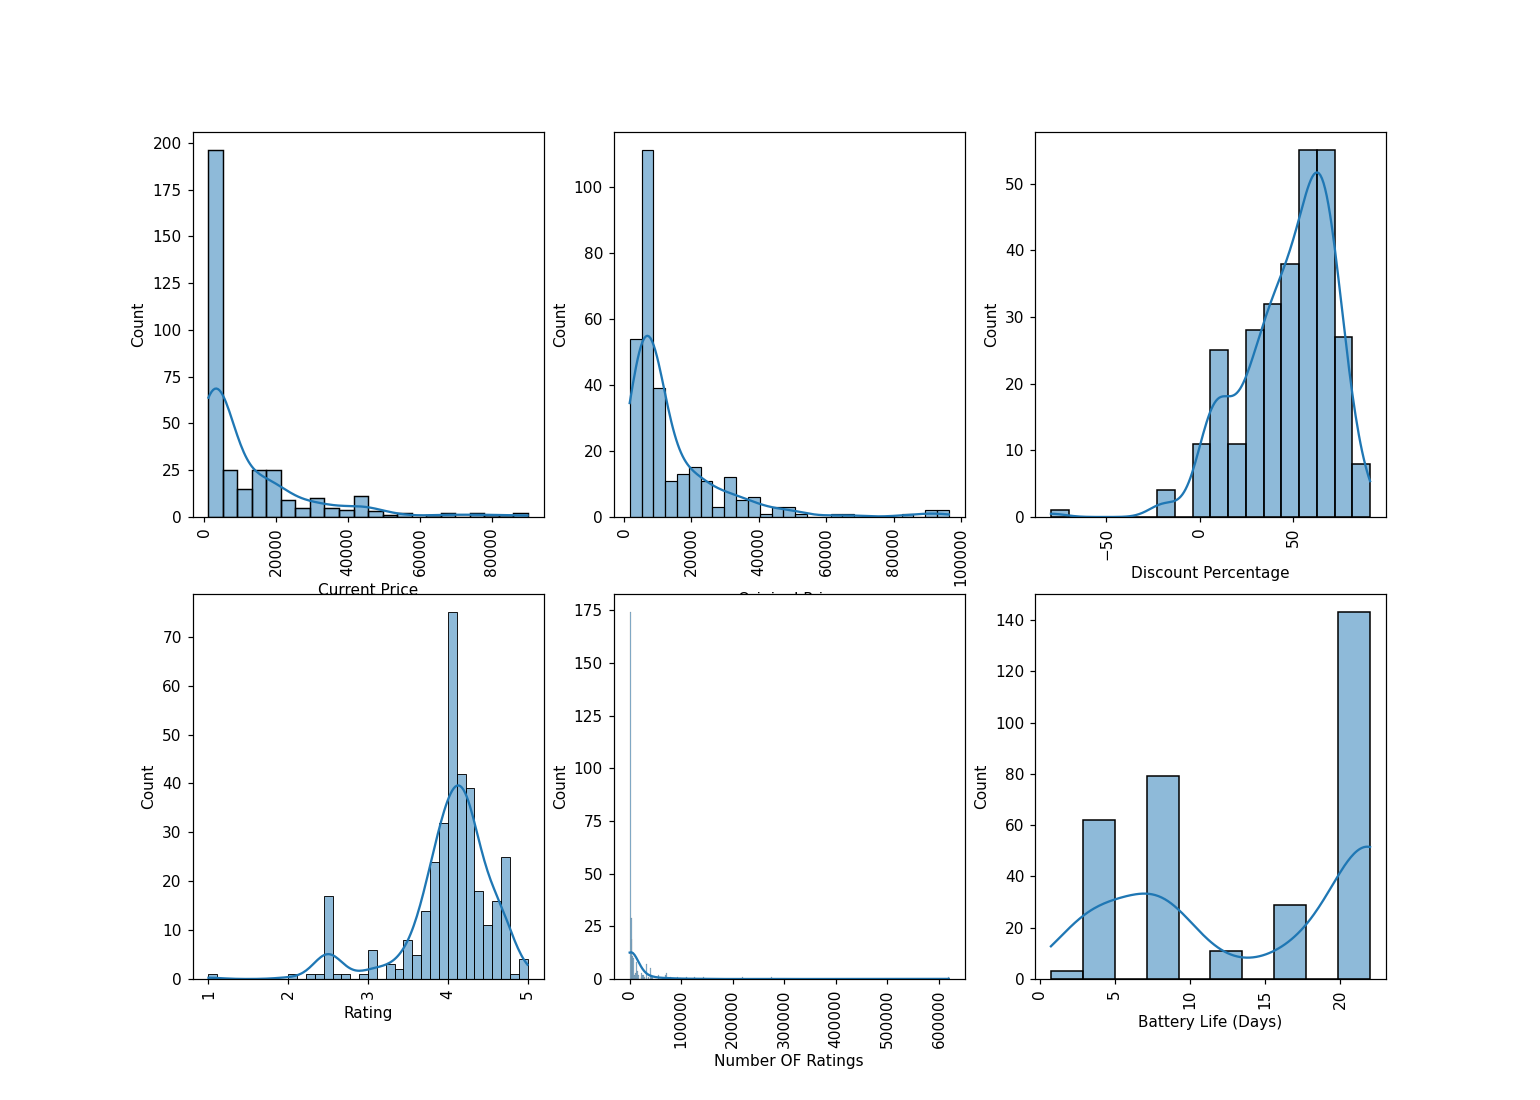

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

In [168]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=train_df[column], ax=ax,kde = True)
    ax.tick_params(axis='x', labelrotation=90)  # Rotate x-axis tick labels by 90 degrees

plt.show()

<IPython.core.display.Javascript object>


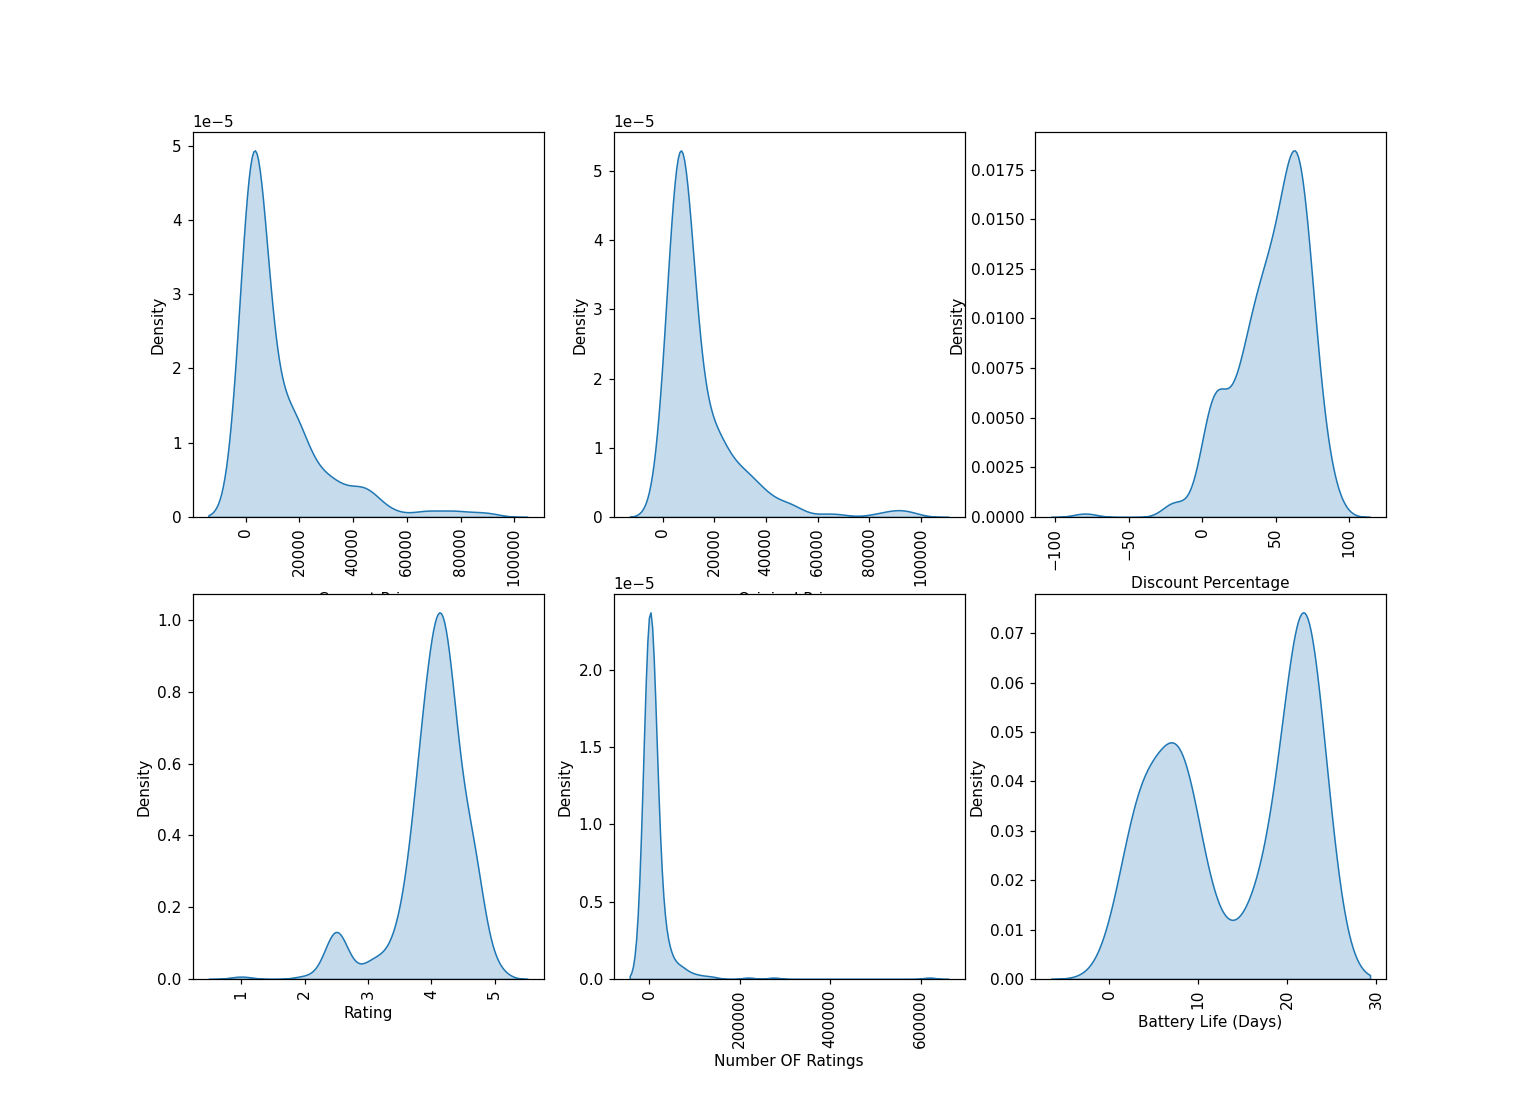

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

In [169]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill= True)
    ax.tick_params(axis='x', labelrotation=90)  # Rotate x-axis tick labels by 90 degrees

plt.show()

In [187]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=train_df[column], ax=ax)
    ax.tick_params(axis='x', labelrotation=90)  # Rotate x-axis tick labels by 90 degrees
    ax.set_xlabel(column)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [188]:
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

# FEATURE ENGINEERING

In [172]:
train_df["Display Size"].isna().sum()

26

In [173]:
train_df["Display Size"].fillna("0.0 inches",inplace = True)

In [174]:
train_df["Display Size"].isna().sum()

0

In [175]:
train_df["Display Size"] = train_df["Display Size"].str.split(" ",expand = True)[0].astype(float)

In [181]:
train_df

Brand  Current Price  Original Price  Discount Percentage  Rating  \
275     garmin        64990.0         82990.0            21.689360     4.7   
84     ambrane         2368.0          4499.0            47.366081     3.5   
357    ambrane         1799.0          3799.0            52.645433     4.2   
265     garmin        33490.0         36990.0             9.462017     4.6   
337    gizmore         1199.0          4499.0            73.349633     4.7   
..         ...            ...             ...                  ...     ...   
289     huawei        10990.0         20990.0            47.641734     4.5   
390  zebronics         2199.0          4999.0            56.011202     3.9   
347    gizmore         1999.0          5999.0            66.677780     3.5   
246    amazfit         6999.0          9999.0            30.003000     3.7   
217     fitbit        14999.0             NaN                  NaN     4.7   

     Number OF Ratings                                         Model Name  \
275                NaN  Fenix 6S Sapphire, Premium GPS Watch, Music, P...   
84               301.0                                       FitShot Curl   
357             8003.0               Flex 1.69inch Lucid display and SPO2   
265                5.0  Instinct 2, Battery Upto 28 days, Tracback Rou...   
337                NaN  GizFit CLOUD 1.85 IPS Large Display | AI Voice...   
..                 ...                                                ...   
289              203.0                                     Watch GT Sport   
390              272.0                                         Zeb-Fit Me   
347               30.0  Gizfit Slate BT Calling | 1.57 Inch display | ...   
246               81.0  GTS2 Mini with 1.55" AMOLED Display Built-in A...   
217                NaN                                           Charge 5   

    Dial Shape Strap Color               Strap Material Touchscreen  \
275     Circle       Black                      Silicon         Yes   
84         NaN         NaN                          NaN         NaN   
357     Square        Pink                      Silicon         Yes   
265     Circle       Black                      Silicon          No   
337     Square        Blue                      Silicon         Yes   
..         ...         ...                          ...         ...   
289     Circle       Black                      Silicon         Yes   
390     Square       Green  Thermo Plastic Polyurethene         Yes   
347  Rectangle       Black                      Silicon         Yes   
246  Rectangle       Black                      Silicon         Yes   
217  Rectangle       Black                      Silicon         Yes   

     Battery Life (Days) Bluetooth  Display Size     Weight  
275                 22.0       Yes           1.2      75g +  
84                  12.5       Yes           NaN  35 - 50 g  
357                 22.0       Yes           1.7        NaN  
265                 17.5       Yes           0.9        NaN  
337                 22.0       Yes           1.8  20 - 35 g  
..                   ...       ...           ...        ...  
289                  8.0       Yes           1.8      75g +  
390                 22.0       Yes           3.3  20 - 35 g  
347                  3.5       Yes           1.6    <= 20 g  
246                  8.0       Yes           1.6        NaN  
217                 22.0       Yes           1.0    <= 20 g  

[352 rows x 15 columns]

In [179]:
train_df["Display Size"].replace(0.0,np.nan,inplace = True)

In [190]:
brand_avg = train_df.groupby('Brand')['Display Size'].mean()

In [197]:
brand_avg = brand_avg.reset_index()["Display Size"]

In [200]:
df["Display Size"].fillna(brand_avg)

0        1.646154
1      1.8 inches
2      1.7 inches
3      1.8 inches
4      1.7 inches
          ...    
445    1.3 inches
446    0.1 inches
447    1.3 inches
448    0.1 inches
449    0.1 inches
Name: Display Size, Length: 440, dtype: object

In [201]:
train_df

Brand  Current Price  Original Price  Discount Percentage  Rating  \
275     garmin        64990.0         82990.0            21.689360     4.7   
84     ambrane         2368.0          4499.0            47.366081     3.5   
357    ambrane         1799.0          3799.0            52.645433     4.2   
265     garmin        33490.0         36990.0             9.462017     4.6   
337    gizmore         1199.0          4499.0            73.349633     4.7   
..         ...            ...             ...                  ...     ...   
289     huawei        10990.0         20990.0            47.641734     4.5   
390  zebronics         2199.0          4999.0            56.011202     3.9   
347    gizmore         1999.0          5999.0            66.677780     3.5   
246    amazfit         6999.0          9999.0            30.003000     3.7   
217     fitbit        14999.0             NaN                  NaN     4.7   

     Number OF Ratings                                         Model Name  \
275                NaN  Fenix 6S Sapphire, Premium GPS Watch, Music, P...   
84               301.0                                       FitShot Curl   
357             8003.0               Flex 1.69inch Lucid display and SPO2   
265                5.0  Instinct 2, Battery Upto 28 days, Tracback Rou...   
337                NaN  GizFit CLOUD 1.85 IPS Large Display | AI Voice...   
..                 ...                                                ...   
289              203.0                                     Watch GT Sport   
390              272.0                                         Zeb-Fit Me   
347               30.0  Gizfit Slate BT Calling | 1.57 Inch display | ...   
246               81.0  GTS2 Mini with 1.55" AMOLED Display Built-in A...   
217                NaN                                           Charge 5   

    Dial Shape Strap Color               Strap Material Touchscreen  \
275     Circle       Black                      Silicon         Yes   
84         NaN         NaN                          NaN         NaN   
357     Square        Pink                      Silicon         Yes   
265     Circle       Black                      Silicon          No   
337     Square        Blue                      Silicon         Yes   
..         ...         ...                          ...         ...   
289     Circle       Black                      Silicon         Yes   
390     Square       Green  Thermo Plastic Polyurethene         Yes   
347  Rectangle       Black                      Silicon         Yes   
246  Rectangle       Black                      Silicon         Yes   
217  Rectangle       Black                      Silicon         Yes   

     Battery Life (Days) Bluetooth  Display Size     Weight  
275                 22.0       Yes           1.2      75g +  
84                  12.5       Yes           NaN  35 - 50 g  
357                 22.0       Yes           1.7        NaN  
265                 17.5       Yes           0.9        NaN  
337                 22.0       Yes           1.8  20 - 35 g  
..                   ...       ...           ...        ...  
289                  8.0       Yes           1.8      75g +  
390                 22.0       Yes           3.3  20 - 35 g  
347                  3.5       Yes           1.6    <= 20 g  
246                  8.0       Yes           1.6        NaN  
217                 22.0       Yes           1.0    <= 20 g  

[352 rows x 15 columns]